In [1]:
import pandas as pd
import numpy as np
import os
import re
from datetime import date
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = 'E:\\College\\Year_4\\Semester_2\\Final_Project\\Data_Files'

PRICE_DATA_PATH = DATA_PATH + '\\Regular'

ORIGINAL_PRICE_DATA_PATH = DATA_PATH + '\\Original'

PREPROCESSED_PRICE_DATA_PATH = DATA_PATH + '\\Preprocessed'

INCOME_DATA_PATH = DATA_PATH + '\\Income_By_District'
MEAN_INCOME_DATA_PATH = INCOME_DATA_PATH + '\\Mean'
MEDIAN_INCOME_DATA_PATH = INCOME_DATA_PATH + '\\Median'
PROSPERITY_DATA_PATH = DATA_PATH + '\\Prosperity'

MODEL_BIN_DATA_PATH = DATA_PATH + '\\Model_Prop_Bin_Preprocessed'
MODEL_DIS_DATA_PATH = DATA_PATH + '\\Model_Prop_Dis_Preprocessed'

MODEL_BIN_TRAIN = DATA_PATH + '\\Model_Prop_Bin_Train'
MODEL_BIN_TEST = DATA_PATH + '\\Model_Prop_Bin_Test'
MODEL_DIS_TRAIN = DATA_PATH + '\\Model_Prop_Dis_Train'
MODEL_DIS_TEST = DATA_PATH + '\\Model_Prop_Dis_Test'

MODEL_BIN_COMB = DATA_PATH + '\\Model_Prop_Bin_Combined'
MODEL_DIS_COMB = DATA_PATH + '\\Model_Prop_Dis_Combined'

RESULTS_PATH = DATA_PATH + '\\Results'


regions_of_england = ['north east', 'north west', 'yorkshire and the humber', 'west midlands', 'east midlands',
                      'east of england', 'london', 'south east', 'south west']

regions = regions_of_england
regions.append('wales')


In [3]:
def get_real_estate_df(year):
    return pd.read_csv(os.path.join(PREPROCESSED_PRICE_DATA_PATH, 'preprocessed-{}.csv'.format(year)), index_col='id')

# General Sales Visualizations

In [4]:
all_prices_years = {}
avg_prices = []
regional_avg = {i: [] for i in regions}
county_avg = {}
num_sales = []
regional_sales = {i: [] for i in regions}
county_sales = {}
avg_prices_by_month = []
avg_sales_by_month = []
for yr in range(1999, 2019):
    df_yr = get_real_estate_df(yr)
    all_prices_years[yr] = list(df_yr['price'])
    avg_prices.append(df_yr['price'].mean())
    num_sales.append(len(df_yr.index))
    for reg in regions:
        df_reg = df_yr[df_yr['region'] == reg]
        regional_avg[reg].append(df_reg['price'].mean())
        regional_sales[reg].append(len(df_reg.index))
    for county in set(df_yr['county']):
        df_county = df_yr[df_yr['county'] == county]
        if county not in county_avg:
            county_avg[county] = [df_county['price'].mean()]
            county_sales[county] = [len(df_county.index)]
        else:
            county_avg[county].append(df_county['price'].mean())
            county_sales[county].append(len(df_county.index))
    for month in range(1, 13):
        df_month = df_yr[df_yr['date'].str.contains('-{}-'.format(str(month) if month >= 10 else '0{}'.format(month)))]
        avg_prices_by_month.append(df_month['price'].mean())
        avg_sales_by_month.append(len(df_month.index))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'lime', 'orange', 'grey', 'pink', 'k']
regions_incl_england_and_wales = [i for i in regions]
regions_incl_england_and_wales.append('england and wales')
counties_avg = sorted({i: np.mean(county_avg[i]) for i in county_avg.keys() if len(county_avg[i]) == 20}.items(), key=lambda kv: kv[1], reverse=True)
top_10_avg = next(iter(zip(*(counties_avg[:10]))))
bottom_10_avg = next(iter(zip(*(counties_avg[-10:]))))
top_10_incl_england_and_wales = [i for i in top_10_avg]
top_10_incl_england_and_wales.append('england and wales')
bottom_10_incl_england_and_wales = [i for i in bottom_10_avg]
bottom_10_incl_england_and_wales.append('england and wales')

Graph 1.1

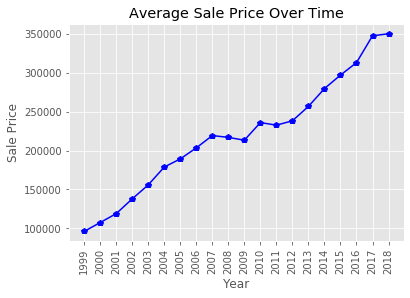

In [5]:
plt.plot(np.arange(1999, 2019), avg_prices, 'p-b')
plt.title('Average Sale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.show()

Graph 1.2

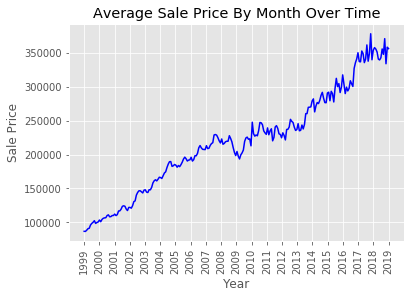

In [6]:
plt.plot(np.linspace(1999, 2019, num=240), avg_prices_by_month, '-b')
plt.title('Average Sale Price By Month Over Time')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.xticks(np.arange(1999, 2020), rotation='vertical')
plt.show()

Graph 1.3

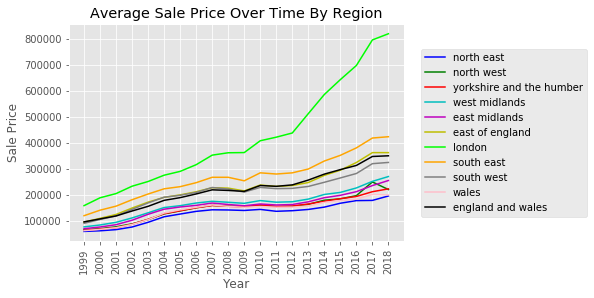

In [7]:
for i, reg in enumerate(regions):
    plt.plot(np.arange(1999, 2019), regional_avg[reg], colors[i])
plt.plot(np.arange(1999, 2019), avg_prices, colors[-1])
plt.title('Average Sale Price Over Time By Region')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(regions_incl_england_and_wales, loc='center', bbox_to_anchor=(1.3, 0.5))
plt.show()

Graph 1.4

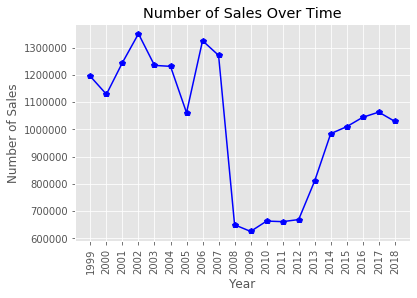

In [8]:
plt.plot(np.arange(1999, 2019), num_sales, 'p-b')
plt.title('Number of Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.show()

Graph 1.5

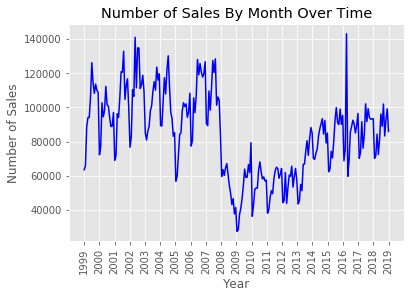

In [9]:
plt.plot(np.linspace(1999, 2019, num=240), avg_sales_by_month, '-b')
plt.title('Number of Sales By Month Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(np.arange(1999, 2020), rotation='vertical')
plt.show()

Graph 1.6

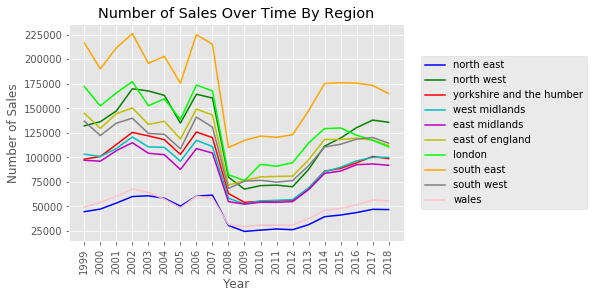

In [10]:
for i, reg in enumerate(regions):
    plt.plot(np.arange(1999, 2019), regional_sales[reg], colors[i])
plt.title('Number of Sales Over Time By Region')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(regions, loc='center', bbox_to_anchor=(1.3, 0.5))
plt.show()

Graph 1.7

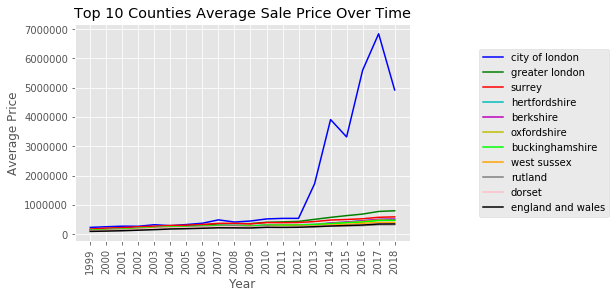

In [11]:
for i, county in enumerate(top_10_avg):
    plt.plot(np.arange(1999, 2019), county_avg[county], colors[i])
plt.plot(np.arange(1999, 2019), avg_prices, colors[-1])
plt.title('Top 10 Counties Average Sale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(top_10_incl_england_and_wales, loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 1.8

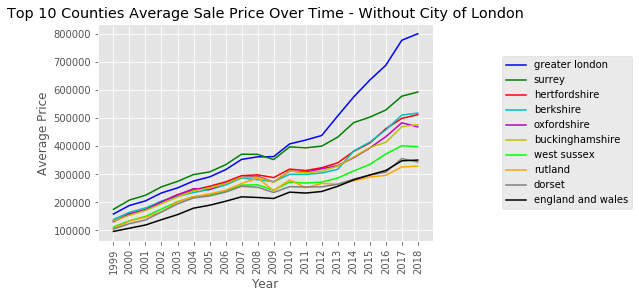

In [12]:
for i, county in enumerate(top_10_avg[1:]):
    plt.plot(np.arange(1999, 2019), county_avg[county], colors[i])
plt.plot(np.arange(1999, 2019), avg_prices, colors[-1])
plt.title('Top 10 Counties Average Sale Price Over Time - Without City of London')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(top_10_incl_england_and_wales[1:], loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 1.9

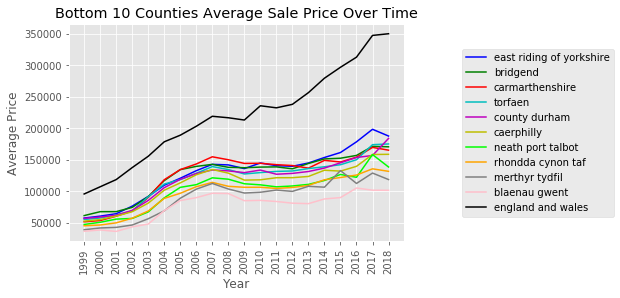

In [13]:
for i, county in enumerate(bottom_10_avg):
    plt.plot(np.arange(1999, 2019), county_avg[county], colors[i])
plt.plot(np.arange(1999, 2019), avg_prices, colors[-1])
plt.title('Bottom 10 Counties Average Sale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(bottom_10_incl_england_and_wales, loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graphs 1.10.1-1.10.20

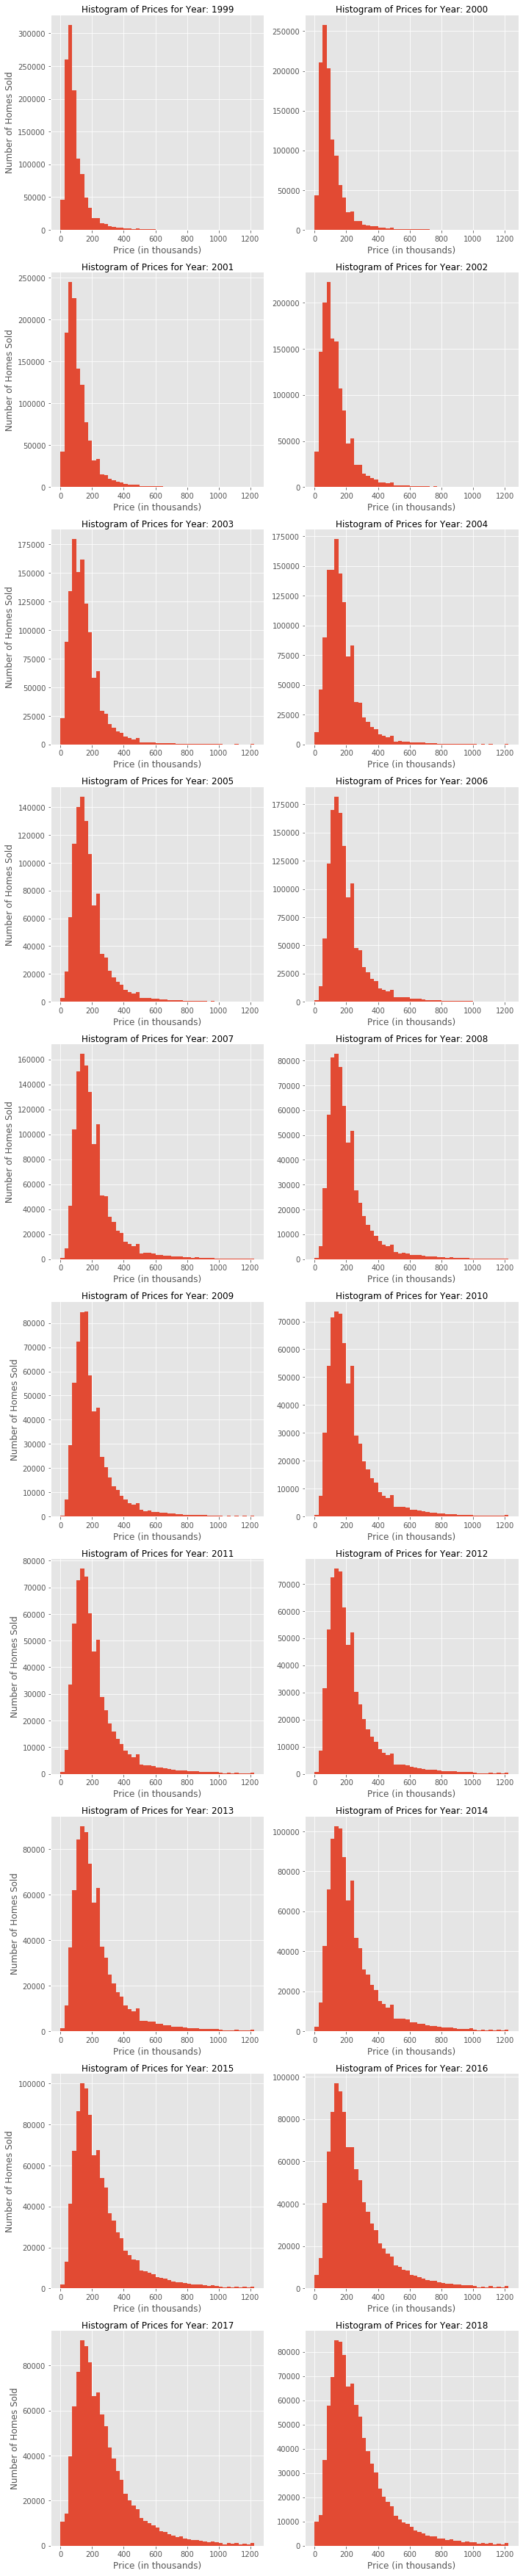

In [14]:
fig, axs = plt.subplots(10, 2)
for i in range(len(axs)):
    year_left = 1999 + (2 * i)
    year_right = year_left + 1
    axs[i][0].hist(all_prices_years[year_left], bins=[i * 25000 for i in range(50)])
    axs[i][0].set_title('Histogram of Prices for Year: {}'.format(year_left), fontsize=12, y=0.99)
    axs[i][1].hist(all_prices_years[year_right], bins=[i * 25000 for i in range(50)])
    axs[i][1].set_title('Histogram of Prices for Year: {}'.format(year_right), fontsize=12, y=0.99)
    axs[i][0].set_xlabel('Price (in thousands)')
    axs[i][0].set_xticklabels([str(i * 100) for i in range(-2,13,2)])
    axs[i][1].set_xlabel('Price (in thousands)')
    axs[i][1].set_xticklabels([str(i * 100) for i in range(-2,13,2)])
    axs[i][0].set_ylabel('Number of Homes Sold')
fig.set_figwidth(10)
fig.set_figheight(10 * len(axs) // 2)
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.show()

Graph 1.11

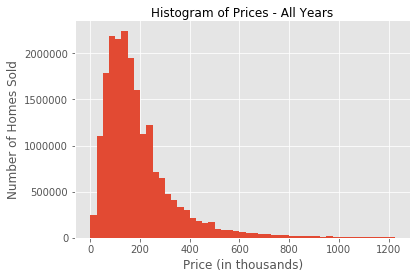

In [15]:
fig, ax = plt.subplots()
ax.hist([j for i in range(1999, 2019) for j in all_prices_years[i]], bins=[i * 25000 for i in range(50)])
ax.set_title('Histogram of Prices - All Years', fontsize=12, y=0.99)
ax.set_xlabel('Price (in thousands)')
ax.set_xticklabels([str(i * 100) for i in range(-2,13,2)])
ax.set_ylabel('Number of Homes Sold')
plt.show()

Graphs 1.12.1-1.12.20

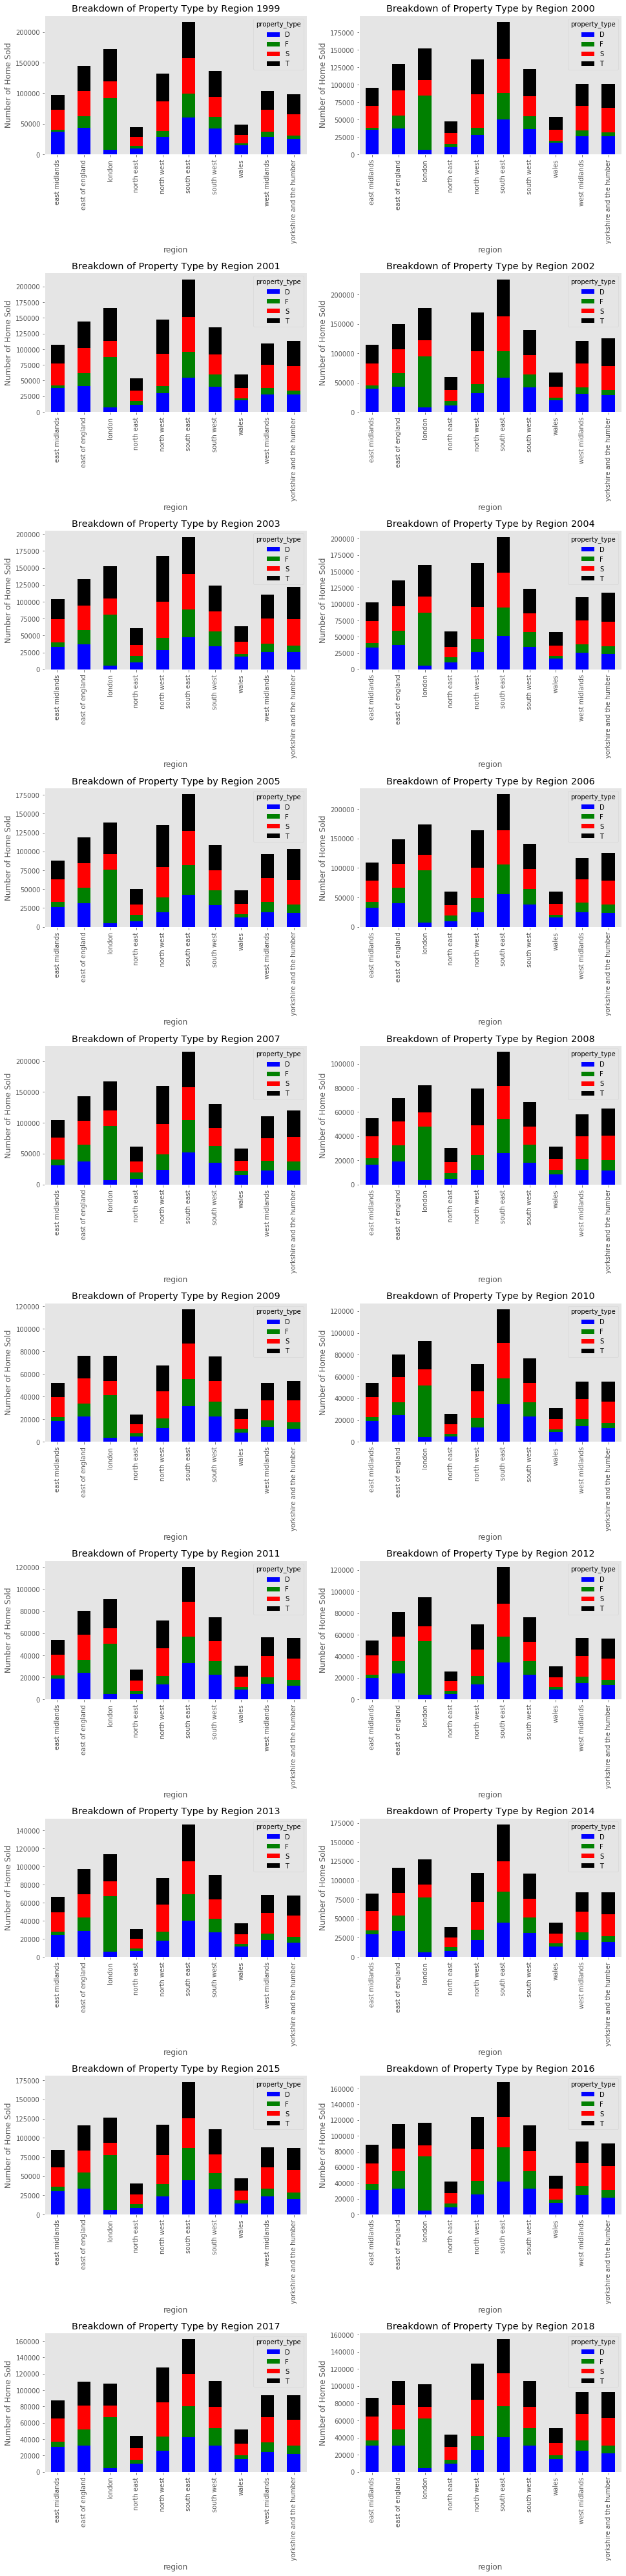

In [16]:
fig, axs = plt.subplots(10, 2, gridspec_kw={'hspace': 0.85})
i = 0
j = 0
for yr in range(1999, 2019):
    df = get_real_estate_df(yr)
    df = df[df['property_type'] != 'O']
    all_property_types = list(df['property_type'].values)
    all_regions = list(df['region'].values)
    df_regions_property_types = pd.DataFrame(np.array([all_property_types, all_regions]).T, columns=['property_type', 'region'])
    temp = pd.crosstab(df_regions_property_types['region'], df_regions_property_types['property_type'])
    temp.plot(kind='bar', stacked=True, color=['b', 'g', 'r', 'k'], grid=False, ax=axs[i,j], figsize=(16, 70))
    axs[i,j].set_title('Breakdown of Property Type by Region {}'.format(yr))
    axs[i,j].set_ylabel('Number of Home Sold')
    i = i + 1 if j == 1 else i
    j = j + 1 if j == 0 else j - 1
plt.show()

Graph 1.13

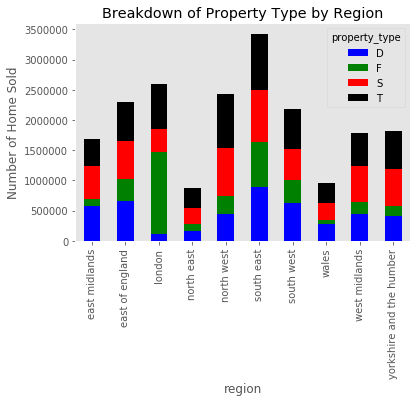

In [17]:
all_property_types = []
all_regions = []
for yr in range(1999, 2019):
    df = get_real_estate_df(yr)
    df = df[df['property_type'] != 'O']
    all_property_types.append(list(df['property_type'].values))
    all_regions.append(list(df['region'].values))
all_property_types = [i for j in all_property_types for i in j]
all_regions = [i for j in all_regions for i in j]
df_regions_property_types = pd.DataFrame(np.array([all_property_types, all_regions]).T, columns=['property_type', 'region'])
temp = pd.crosstab(df_regions_property_types['region'], df_regions_property_types['property_type'])
temp.plot(kind='bar', stacked=True, color=['b', 'g', 'r', 'k'], grid=False)
plt.title('Breakdown of Property Type by Region')
plt.ylabel('Number of Home Sold')
plt.show()

Graph 1.14

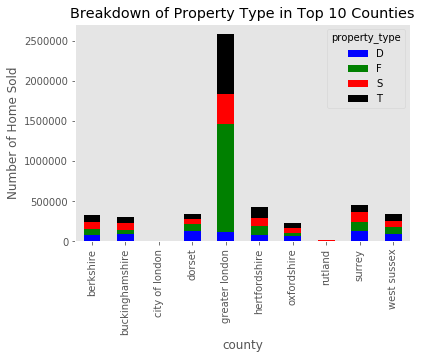

In [18]:
top_10_property_types = []
top_10_counties = []
for yr in range(1999, 2019):
    df = get_real_estate_df(yr)
    df = df[df['property_type'] != 'O']
    df = df[df['county'].isin(top_10_avg)]
    top_10_property_types.append(list(df['property_type'].values))
    top_10_counties.append(list(df['county'].values))
top_10_property_types = [i for j in top_10_property_types for i in j]
top_10_counties = [i for j in top_10_counties for i in j]
df_top_10_property_types = pd.DataFrame(np.array([top_10_property_types, top_10_counties]).T, columns=['property_type', 'county'])
temp = pd.crosstab(df_top_10_property_types['county'], df_top_10_property_types['property_type'])
temp.plot(kind='bar', stacked=True, color=['b', 'g', 'r', 'k'], grid=False)
plt.title('Breakdown of Property Type in Top 10 Counties')
plt.ylabel('Number of Home Sold')
plt.show()

Graph 1.15

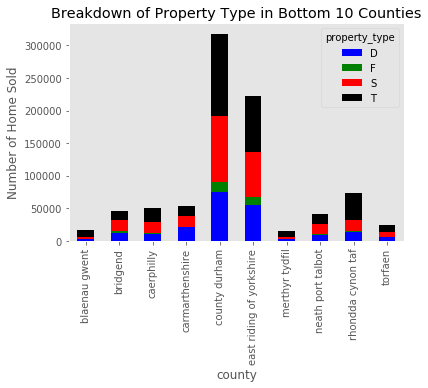

In [19]:
bottom_10_property_types = []
bottom_10_counties = []
for yr in range(1999, 2019):
    df = get_real_estate_df(yr)
    df = df[df['property_type'] != 'O']
    df = df[df['county'].isin(bottom_10_avg)]
    bottom_10_property_types.append(list(df['property_type'].values))
    bottom_10_counties.append(list(df['county'].values))
bottom_10_property_types = [i for j in bottom_10_property_types for i in j]
bottom_10_counties = [i for j in bottom_10_counties for i in j]
df_bottom_10_property_types = pd.DataFrame(np.array([bottom_10_property_types, bottom_10_counties]).T, columns=['property_type', 'county'])
temp = pd.crosstab(df_bottom_10_property_types['county'], df_bottom_10_property_types['property_type'])
temp.plot(kind='bar', stacked=True, color=['b', 'g', 'r', 'k'], grid=False)
plt.title('Breakdown of Property Type in Bottom 10 Counties')
plt.ylabel('Number of Home Sold')
plt.show()

Graph 1.16

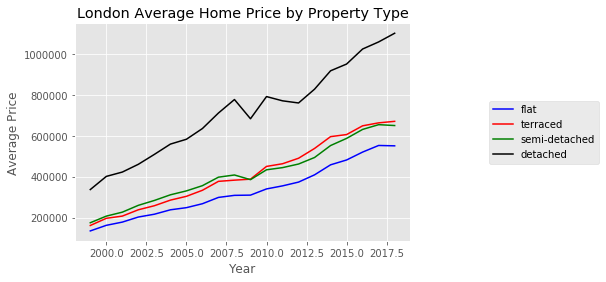

In [20]:
london_f_prices = []
london_t_prices = []
london_s_prices = []
london_d_prices = []
for yr in range(1999, 2019):
    df = get_real_estate_df(yr)
    df = df[df['property_type'] != 'O']
    df = df[df['region'] == 'london']
    df = df[['price', 'property_type']]
    df = df.groupby(df['property_type']).mean()
    london_f_prices.append(df['price']['F'])
    london_t_prices.append(df['price']['T'])
    london_s_prices.append(df['price']['S'])
    london_d_prices.append(df['price']['D'])
plt.plot(np.arange(1999, 2019), london_f_prices, c='b', label='flat')
plt.plot(np.arange(1999, 2019), london_t_prices, c='r', label='terraced')
plt.plot(np.arange(1999, 2019), london_s_prices, c='g', label='semi-detached')
plt.plot(np.arange(1999, 2019), london_d_prices, c='k', label='detached')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('London Average Home Price by Property Type')
plt.show()

Graphs 1.17.1-1.17.80

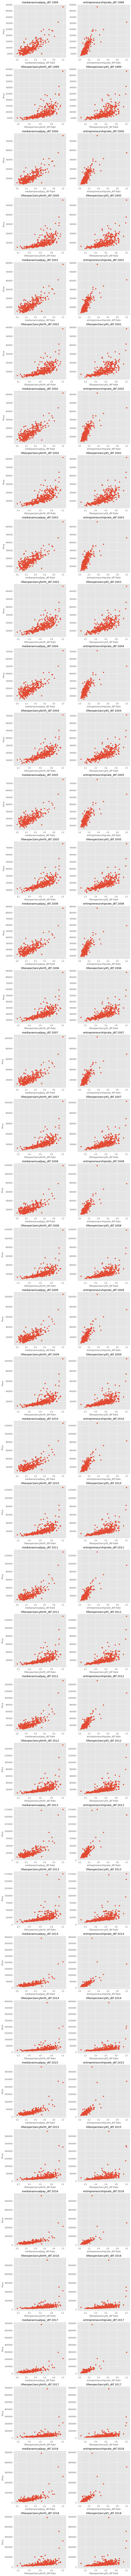

In [21]:
correlation_columns = ['medianannualpay_dtf', 'entrepreneurshiprate_dtf', 'lifeexpectancybirth_dtf', 'lifeexpectancy65_dtf']
fig, axs = plt.subplots(40, 2)
year = 1998
for i in range(len(axs)):
    if i % 2 == 0:
        year += 1
        df_yr = get_real_estate_df(year)
    factor = correlation_columns[(i * 2) % 4]
    df_factor = df_yr[['price', factor]].groupby(df_yr[factor]).mean()
    axs[i][0].scatter(df_factor[factor], df_factor['price'])
    axs[i][0].set_title('{} {}'.format(factor, year))
    axs[i][0].set_xlabel('{} Rate'.format(factor))
    axs[i][0].set_ylabel('Price')
    factor = correlation_columns[((i * 2) % 4) + 1]
    df_factor = df_yr[['price', factor]].groupby(df_yr[factor]).mean()
    axs[i][1].scatter(df_factor[factor], df_factor['price'])
    axs[i][1].set_title('{} {}'.format(factor, year))
    axs[i][1].set_xlabel('{} Rate'.format(factor))
fig.set_figwidth(10)
fig.set_figheight(10 * len(axs) // 2)
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.show()

# Model Results

In [22]:
results_df = pd.read_csv(os.path.join(RESULTS_PATH, 'results.csv'), index_col='Year')
results_df_yearly = results_df.iloc[:20]
results_df_all = results_df.loc['All']
model_types = ['SGD - Dis', 'SGD - Bin', 'RF - Dis', 'RF - Bin', 'MLP - Dis', 'MLP - Bin']

Graph 2.1

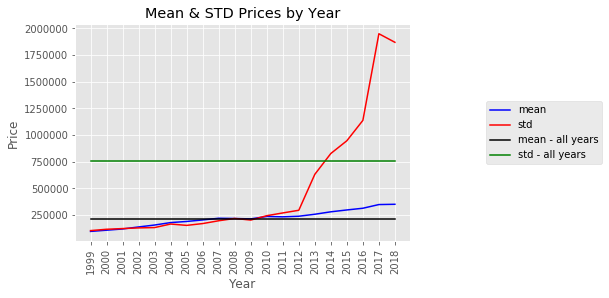

In [23]:
plt.plot(np.arange(1999, 2019), results_df_yearly['Mean'], 'b', label='mean')
plt.plot(np.arange(1999, 2019), results_df_yearly['STD'], 'r', label='std')
plt.plot(np.arange(1999, 2019), [results_df_all['Mean'] for i in range(20)], 'k', label='mean - all years')
plt.plot(np.arange(1999, 2019), [results_df_all['STD'] for i in range(20)], 'g', label='std - all years')
plt.title('Mean & STD Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.2

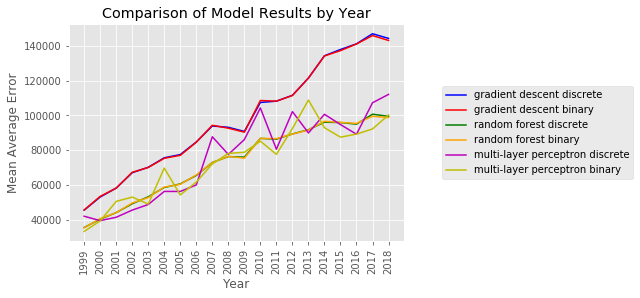

In [24]:
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Dis'], 'b', label='gradient descent discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Bin'], 'r', label='gradient descent binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Dis'], 'g', label='random forest discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Bin'], 'orange', label='random forest binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Dis'], 'm', label='multi-layer perceptron discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Bin'], 'y', label='multi-layer perceptron binary')
plt.title('Comparison of Model Results by Year')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.3

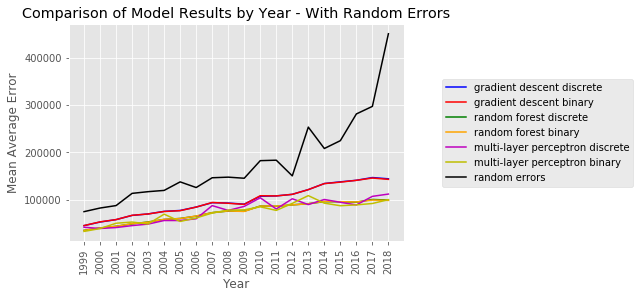

In [25]:
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Dis'], 'b', label='gradient descent discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Bin'], 'r', label='gradient descent binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Dis'], 'g', label='random forest discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Bin'], 'orange', label='random forest binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Dis'], 'm', label='multi-layer perceptron discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Bin'], 'y', label='multi-layer perceptron binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['Random Errors'], 'k', label='random errors')
plt.title('Comparison of Model Results by Year - With Random Errors')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.4

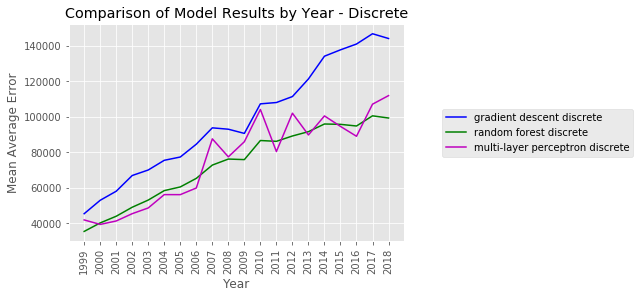

In [26]:
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Dis'], 'b', label='gradient descent discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Dis'], 'g', label='random forest discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Dis'], 'm', label='multi-layer perceptron discrete')
plt.title('Comparison of Model Results by Year - Discrete')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.5

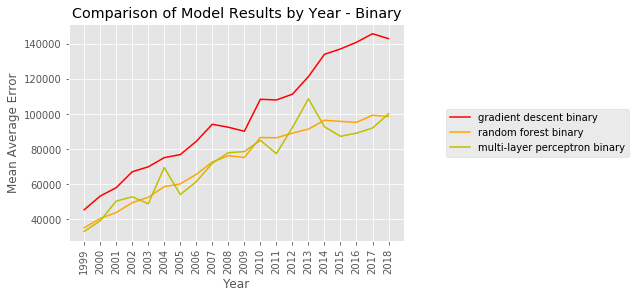

In [27]:
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Bin'], 'r', label='gradient descent binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Bin'], 'orange', label='random forest binary')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Bin'], 'y', label='multi-layer perceptron binary')
plt.title('Comparison of Model Results by Year - Binary')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.6

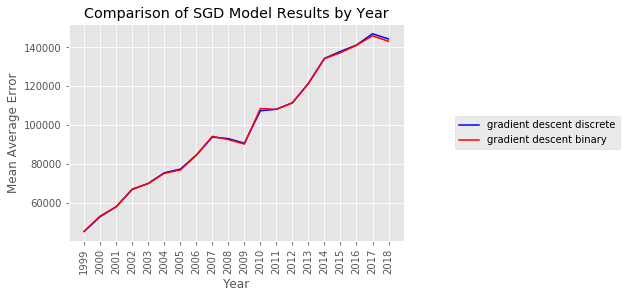

In [28]:
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Dis'], 'b', label='gradient descent discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['SGD - Bin'], 'r', label='gradient descent binary')
plt.title('Comparison of SGD Model Results by Year')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.7

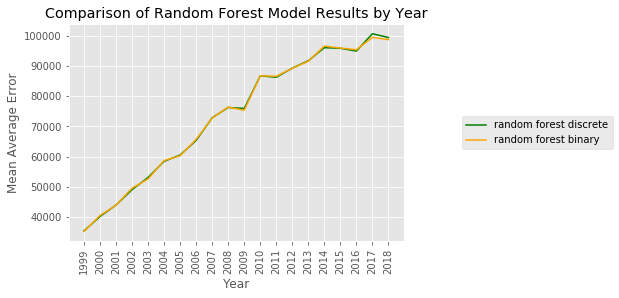

In [29]:
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Dis'], 'g', label='random forest discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['RF - Bin'], 'orange', label='random forest binary')
plt.title('Comparison of Random Forest Model Results by Year')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.8

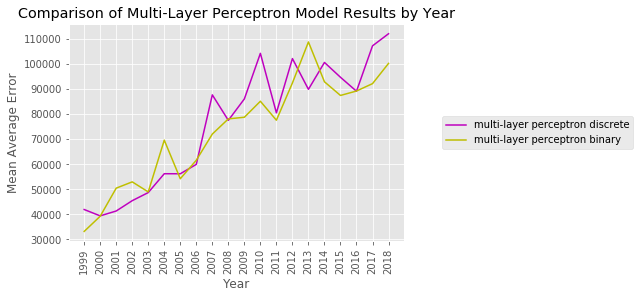

In [30]:
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Dis'], 'm', label='multi-layer perceptron discrete')
plt.plot(np.arange(1999, 2019), results_df_yearly['MLP - Bin'], 'y', label='multi-layer perceptron binary')
plt.title('Comparison of Multi-Layer Perceptron Model Results by Year')
plt.xlabel('Year')
plt.ylabel('Mean Average Error')
plt.xticks(np.arange(1999, 2019), rotation='vertical')
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
plt.show()

Graph 2.9

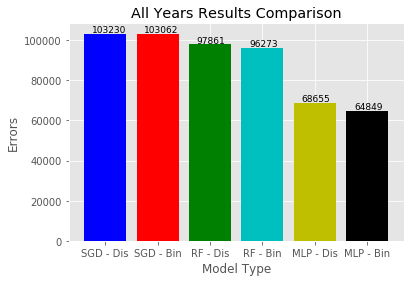

In [31]:
results_df_mod_types = results_df_all.loc[model_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.25, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(model_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison')
plt.show()

Graph 2.10

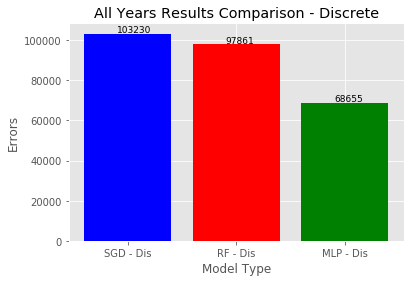

In [32]:
mod_types = ['SGD - Dis', 'RF - Dis', 'MLP - Dis']
results_df_mod_types = results_df_all.loc[mod_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.1, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(mod_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison - Discrete')
plt.show()

Graph 2.11

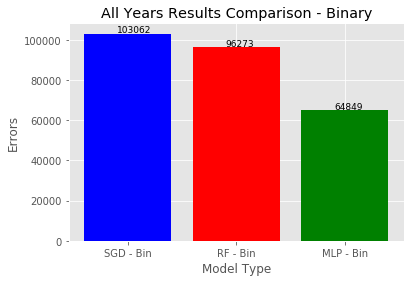

In [33]:
mod_types = ['SGD - Bin', 'RF - Bin', 'MLP - Bin']
results_df_mod_types = results_df_all.loc[mod_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.1, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(mod_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison - Binary')
plt.show()

Graph 2.12

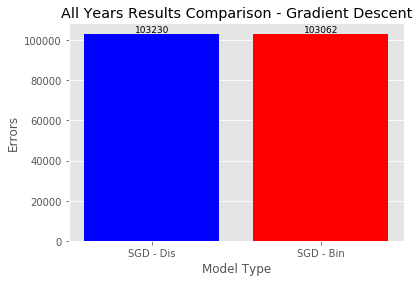

In [34]:
mod_types = ['SGD - Dis', 'SGD - Bin']
results_df_mod_types = results_df_all.loc[mod_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.1, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(mod_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison - Gradient Descent')
plt.show()

Graph 2.13

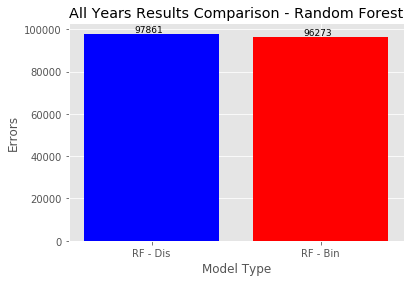

In [35]:
mod_types = ['RF - Dis', 'RF - Bin']
results_df_mod_types = results_df_all.loc[mod_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.1, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(mod_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison - Random Forest')
plt.show()

Graph 2.14

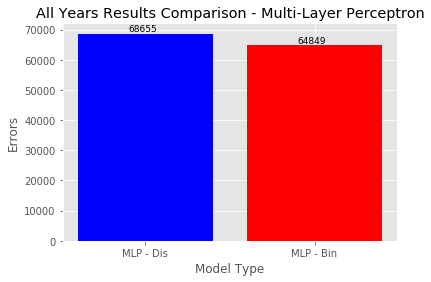

In [36]:
mod_types = ['MLP - Dis', 'MLP - Bin']
results_df_mod_types = results_df_all.loc[mod_types].T
fig, ax = plt.subplots()
res_bar = ax.bar(np.arange(len(results_df_mod_types.keys())), results_df_mod_types.values, color=['b', 'r', 'g', 'c', 'y', 'k'])
for i in range(len(res_bar)):
    ax.text(i - 0.1, res_bar[i]._height + 800, int(round(res_bar[i]._height)), fontsize=9)
ax.set_xticks(np.arange(len(results_df_mod_types.keys())))
ax.set_xticklabels(mod_types)
ax.set_xlabel('Model Type')
ax.set_ylabel('Errors')
ax.set_title('All Years Results Comparison - Multi-Layer Perceptron')
plt.show()

Graph 2.15

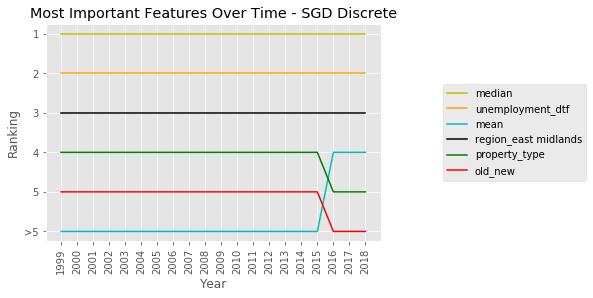

In [37]:
all_values = {i: results_df['Most Important Features - SGD Dis'][str(i)].split(', ') for i in range(1999, 2019)}
features_set = {i for j in range(1999, 2019) for i in all_values[j]}
colors = ['b', 'r', 'g', 'k', 'c', 'orange', 'y']
fig, ax = plt.subplots()
for feature in features_set:
    rankings = [5 - all_values[i].index(feature) if feature in all_values[i] else 0 for i in range(1999, 2019)]
    ax.plot(np.arange(1999, 2019), rankings, c=colors.pop(), label=feature)
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_xticks(np.arange(1999, 2019))
ax.set_xticklabels(np.arange(1999, 2019), rotation='vertical')
ax.set_yticklabels(['>5', '>5', '5', '4', '3', '2', '1'])
ax.set_title('Most Important Features Over Time - SGD Discrete')
plt.show()

Graph 2.16

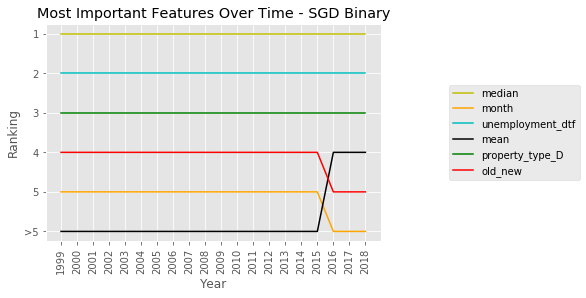

In [38]:
all_values = {i: results_df['Most Important Features - SGD Bin'][str(i)].split(', ') for i in range(1999, 2019)}
features_set = {i for j in range(1999, 2019) for i in all_values[j]}
colors = ['b', 'r', 'g', 'k', 'c', 'orange', 'y']
fig, ax = plt.subplots()
for feature in features_set:
    rankings = [5 - all_values[i].index(feature) if feature in all_values[i] else 0 for i in range(1999, 2019)]
    ax.plot(np.arange(1999, 2019), rankings, c=colors.pop(), label=feature)
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_xticks(np.arange(1999, 2019))
ax.set_xticklabels(np.arange(1999, 2019), rotation='vertical')
ax.set_yticklabels(['>5', '>5', '5', '4', '3', '2', '1'])
ax.set_title('Most Important Features Over Time - SGD Binary')
plt.show()

Graph 2.17

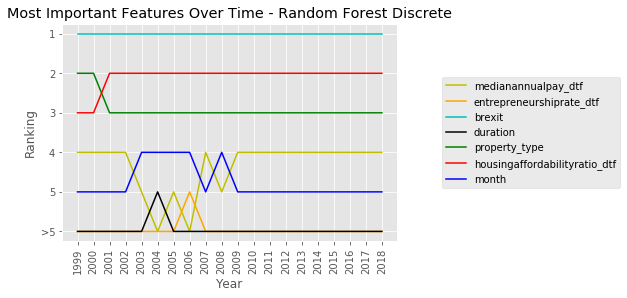

In [39]:
all_values = {i: results_df['Most Important Features - RF Dis'][str(i)].split(', ') for i in range(1999, 2019)}
features_set = {i for j in range(1999, 2019) for i in all_values[j]}
colors = ['b', 'r', 'g', 'k', 'c', 'orange', 'y']
fig, ax = plt.subplots()
for feature in features_set:
    rankings = [5 - all_values[i].index(feature) if feature in all_values[i] else 0 for i in range(1999, 2019)]
    ax.plot(np.arange(1999, 2019), rankings, c=colors.pop(), label=feature)
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_xticks(np.arange(1999, 2019))
ax.set_xticklabels(np.arange(1999, 2019), rotation='vertical')
ax.set_yticklabels(['>5', '>5', '5', '4', '3', '2', '1'])
ax.set_title('Most Important Features Over Time - Random Forest Discrete')
plt.show()

Graph 2.18

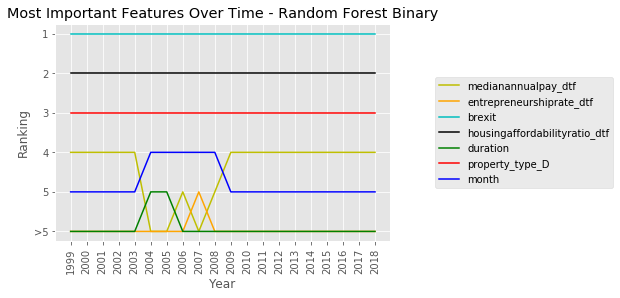

In [40]:
all_values = {i: results_df['Most Important Features - RF Bin'][str(i)].split(', ') for i in range(1999, 2019)}
features_set = {i for j in range(1999, 2019) for i in all_values[j]}
colors = ['b', 'r', 'g', 'k', 'c', 'orange', 'y']
fig, ax = plt.subplots()
for feature in features_set:
    rankings = [5 - all_values[i].index(feature) if feature in all_values[i] else 0 for i in range(1999, 2019)]
    ax.plot(np.arange(1999, 2019), rankings, c=colors.pop(), label=feature)
plt.legend(loc='center', bbox_to_anchor=(1.4, 0.5))
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_xticks(np.arange(1999, 2019))
ax.set_xticklabels(np.arange(1999, 2019), rotation='vertical')
ax.set_yticklabels(['>5', '>5', '5', '4', '3', '2', '1'])
ax.set_title('Most Important Features Over Time - Random Forest Binary')
plt.show()

# Time Series Analysis

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [42]:
df_years = {}
for year in range(1999, 2019):
    df_year = get_real_estate_df(year)
    df_year['date'] = pd.to_datetime(df_year['date'])
    df_year = df_year[['price', 'date']].groupby(df_year['date']).mean()
    df_years[year] = df_year
df_to_plot = df_years[1999]
for yr in range(2000, 2019):
    df_to_plot = pd.concat([df_to_plot, df_years[yr]])
y = df_to_plot['price'].resample('MS').mean()

Graph 3.1

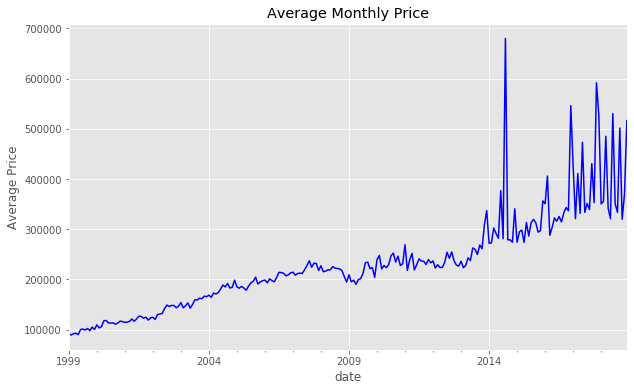

In [43]:
y.plot(c='b')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')
plt.show()

In [44]:
def stationarity_test(time_series, label=''):
    m_avg = time_series.rolling(window=12).mean()
    m_std = time_series.rolling(window=12).std()
    plt.plot(time_series, c='b', label='Series Data')
    plt.plot(m_avg, c='r', label='Moving Average')
    plt.plot(m_std, c='k', label='Moving Standard Deviation')
    plt.legend()
    plt.title('Stationarity Eye-Test - {}'.format(label))
    plt.xlabel('Year')
    plt.ylabel('Prices')
    plt.show()
    
    print('Dickie-Fuller Test Results:')
    d_test = adfuller(time_series, autolag='AIC')
    d_out = pd.Series(d_test[0:4], index=['Test Statistic', 'p-Value', 'Num Lags', 'Num Observations'])
    for k, v in d_test[4].items():
        d_out['Critical Values (%s)'%k] = v
    print(d_out)

Graph 3.2

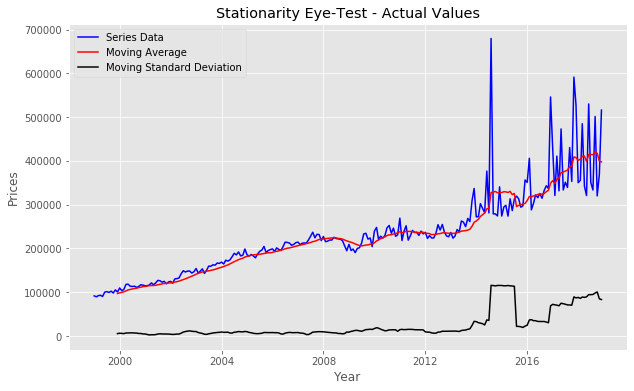

Dickie-Fuller Test Results:
Test Statistic             0.201899
p-Value                    0.972368
Num Lags                  11.000000
Num Observations         228.000000
Critical Values (1%)      -3.459361
Critical Values (5%)      -2.874302
Critical Values (10%)     -2.573571
dtype: float64


In [45]:
stationarity_test(y, 'Actual Values')

Graph 3.3

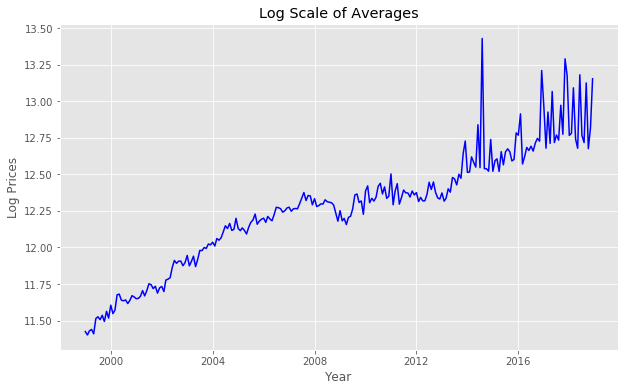

In [46]:
y_log_scale = np.log(y)
plt.plot(y_log_scale, c='b')
plt.title('Log Scale of Averages')
plt.xlabel('Year')
plt.ylabel('Log Prices')
plt.show()

Graph 3.4

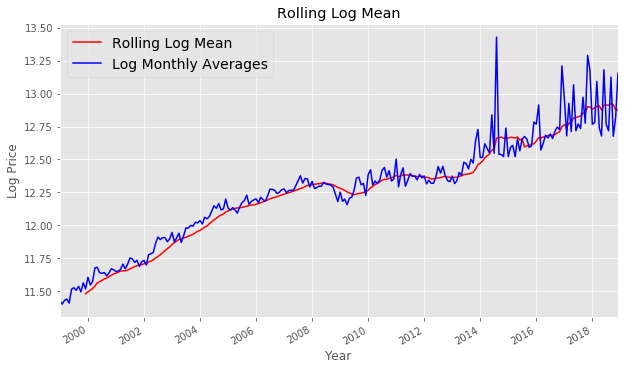

In [47]:
rolling_log_mean = y_log_scale.rolling(window=12).mean()
plt.plot(rolling_log_mean, c='r', label='Rolling Log Mean')
y_log_scale.plot(c='b', label='Log Monthly Averages')
plt.title('Rolling Log Mean')
plt.xlabel('Year')
plt.ylabel('Log Price')
plt.legend(fontsize=14)
plt.show()

Graph 3.5

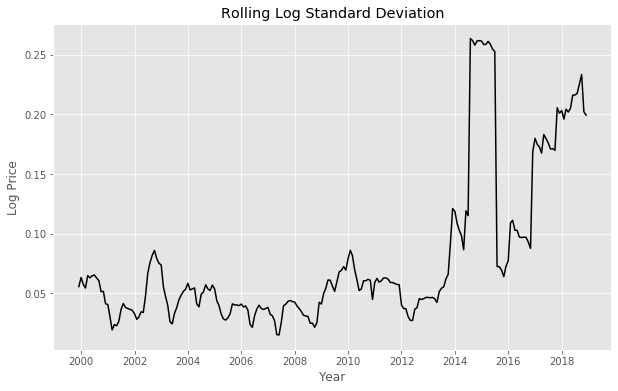

In [48]:
rolling_log_std = y_log_scale.rolling(window=12).std()
plt.plot(rolling_log_std, c='k')
plt.title('Rolling Log Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Log Price')
plt.show()

Graph 3.6

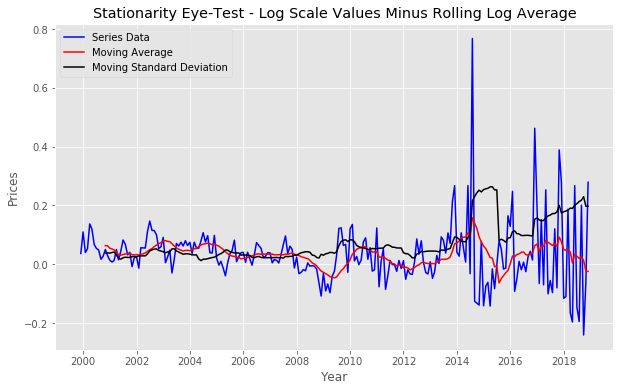

Dickie-Fuller Test Results:
Test Statistic            -5.514298
p-Value                    0.000002
Num Lags                   7.000000
Num Observations         221.000000
Critical Values (1%)      -3.460291
Critical Values (5%)      -2.874709
Critical Values (10%)     -2.573789
dtype: float64


In [49]:
log_minus_avg = y_log_scale - rolling_log_mean
log_minus_avg.dropna(inplace=True)
stationarity_test(log_minus_avg, 'Log Scale Values Minus Rolling Log Average')

Graph 3.7

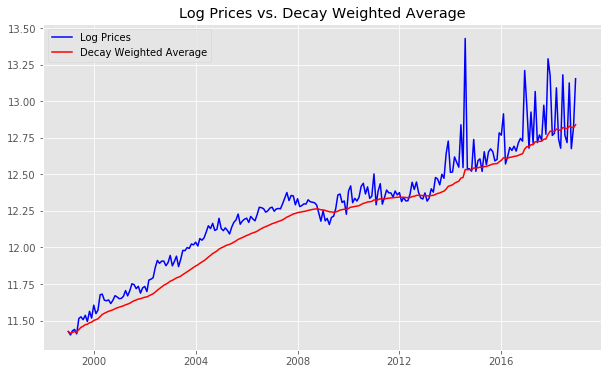

In [50]:
exp_decay_weight_avg = y_log_scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(y_log_scale, c='b', label='Log Prices')
plt.plot(exp_decay_weight_avg, c='r', label='Decay Weighted Average')
plt.legend()
plt.title('Log Prices vs. Decay Weighted Average')
plt.show()

Graph 3.8

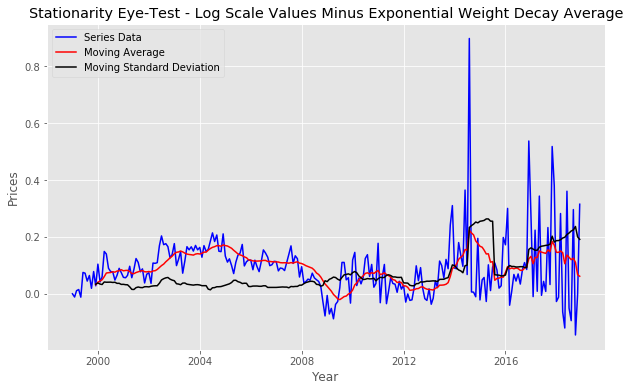

Dickie-Fuller Test Results:
Test Statistic            -4.080340
p-Value                    0.001044
Num Lags                   5.000000
Num Observations         234.000000
Critical Values (1%)      -3.458608
Critical Values (5%)      -2.873972
Critical Values (10%)     -2.573396
dtype: float64


In [51]:
log_minus_moving_exp_decay_weight_avg = y_log_scale - exp_decay_weight_avg
log_minus_moving_exp_decay_weight_avg.dropna(inplace=True)
stationarity_test(log_minus_moving_exp_decay_weight_avg, 'Log Scale Values Minus Exponential Weight Decay Average')

Graph 3.9

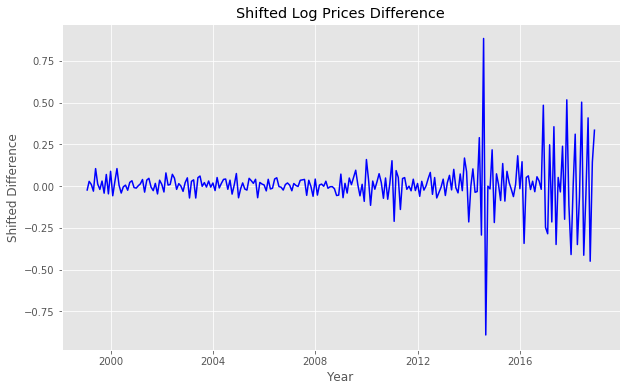

In [52]:
y_log_diff_shifted = y_log_scale - y_log_scale.shift()
plt.plot(y_log_diff_shifted, c='b')
plt.title('Shifted Log Prices Difference')
plt.ylabel('Shifted Difference')
plt.xlabel('Year')
plt.show()

Graph 3.10

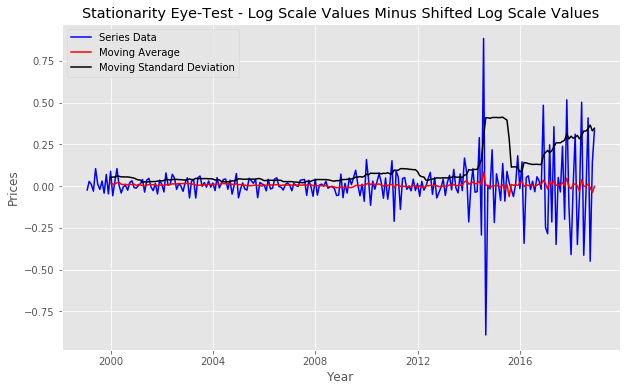

Dickie-Fuller Test Results:
Test Statistic          -7.467923e+00
p-Value                  5.145512e-11
Num Lags                 1.000000e+01
Num Observations         2.280000e+02
Critical Values (1%)    -3.459361e+00
Critical Values (5%)    -2.874302e+00
Critical Values (10%)   -2.573571e+00
dtype: float64


In [53]:
y_log_diff_shifted.dropna(inplace=True)
stationarity_test(y_log_diff_shifted, 'Log Scale Values Minus Shifted Log Scale Values')

Graphs 3.11.1-3.11.4

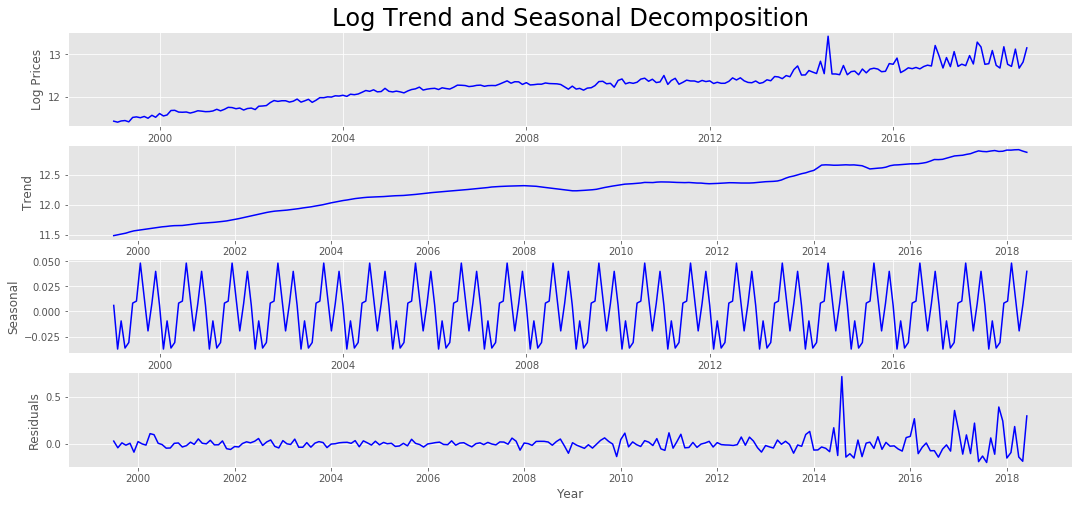

In [54]:
rcParams['figure.figsize'] = 18, 8
log_decomposition = sm.tsa.seasonal_decompose(y_log_scale)
log_trend = log_decomposition.trend
log_seasonal = log_decomposition.seasonal
log_residuals = log_decomposition.resid
plt.subplot(4, 1, 1)
plt.title('Log Trend and Seasonal Decomposition', fontsize=24)
plt.plot(y_log_scale, c='b')
plt.ylabel('Log Prices')
plt.subplot(4, 1, 2)
plt.plot(log_trend, c='b')
plt.ylabel('Trend')
plt.subplot(4, 1, 3)
plt.plot(log_seasonal, c='b')
plt.ylabel('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(log_residuals, c='b')
plt.ylabel('Residuals')
plt.xlabel('Year')
plt.show()

Graphs 3.12.1-3.12.4

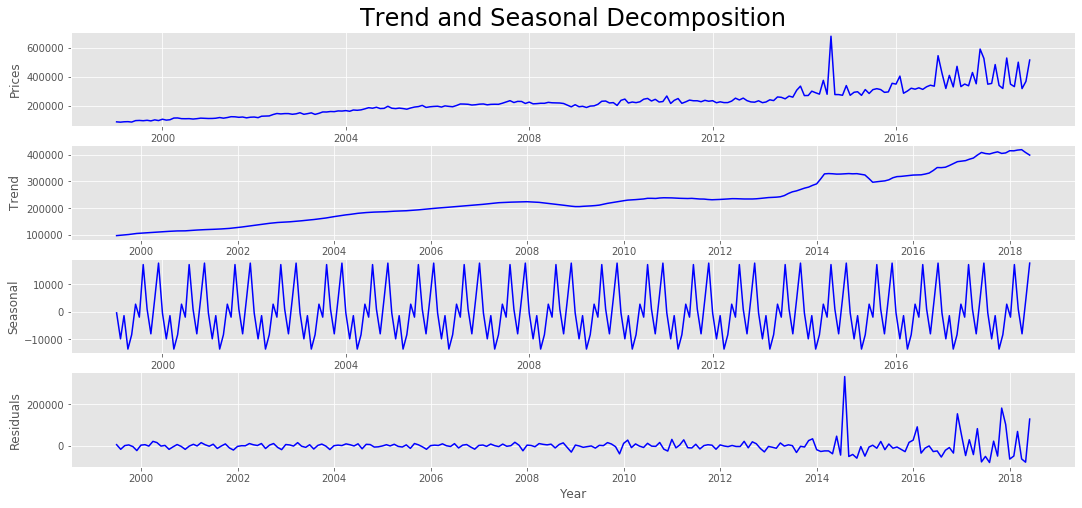

In [55]:
decomp = sm.tsa.seasonal_decompose(y)
trend = decomp.trend
seasonal = decomp.seasonal
residuals = decomp.resid
plt.subplot(4, 1, 1)
plt.title('Trend and Seasonal Decomposition', fontsize=24)
plt.plot(y, c='b')
plt.ylabel('Prices')
plt.subplot(4, 1, 2)
plt.plot(trend, c='b')
plt.ylabel('Trend')
plt.subplot(4, 1, 3)
plt.plot(seasonal, c='b')
plt.ylabel('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(residuals, c='b')
plt.ylabel('Residuals')
plt.xlabel('Year')
plt.show()

Graph 3.13

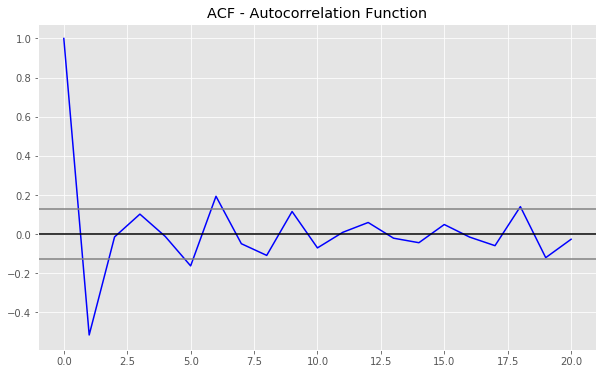

In [56]:
rcParams['figure.figsize'] = 10, 6
lag_acf = sm.tsa.stattools.acf(y_log_diff_shifted, nlags=20)
plt.plot(lag_acf, c='b')
plt.axhline(y=0, color='k')
plt.axhline(y=1.96 / np.sqrt(len(y_log_diff_shifted)), color='grey')
plt.axhline(y=-1.96 / np.sqrt(len(y_log_diff_shifted)), color='grey')
plt.title('ACF - Autocorrelation Function')
plt.show()

Graph 3.14

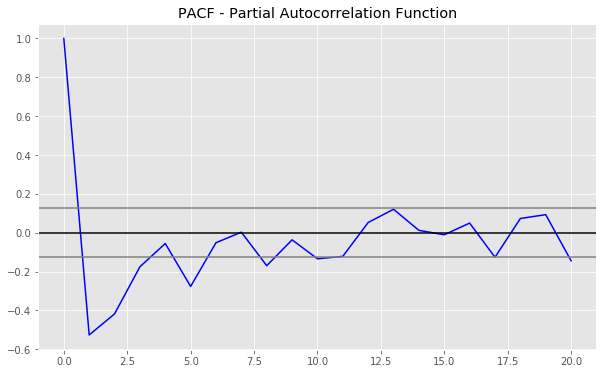

In [57]:
lag_pacf = sm.tsa.stattools.pacf(y_log_diff_shifted, nlags=20, method='ols')
plt.plot(lag_pacf, c='b')
plt.axhline(y=0, color='k')
plt.axhline(y=1.96 / np.sqrt(len(y_log_diff_shifted)), color='grey')
plt.axhline(y=-1.96 / np.sqrt(len(y_log_diff_shifted)), color='grey')
plt.title('PACF - Partial Autocorrelation Function')
plt.show()

Graph 3.15

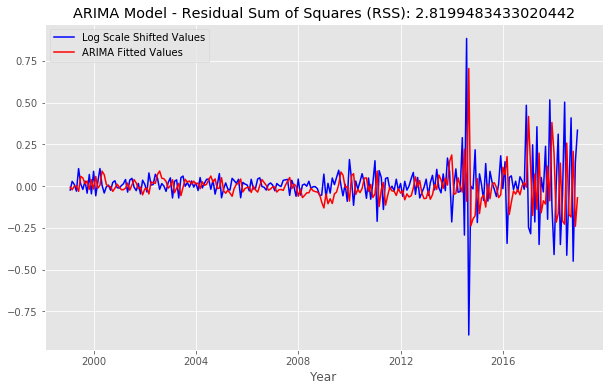

In [58]:
arima_model = ARIMA(y_log_scale, order=(1, 1, 1))
arima_results = arima_model.fit()
plt.plot(y_log_diff_shifted, c='b', label='Log Scale Shifted Values')
plt.plot(-arima_results.fittedvalues, c='r', label='ARIMA Fitted Values')
plt.title('ARIMA Model - Residual Sum of Squares (RSS): {}'.format(sum((arima_results.fittedvalues - y_log_diff_shifted) ** 2)))
plt.xlabel('Year')
plt.legend()
plt.show()

Graph 3.16

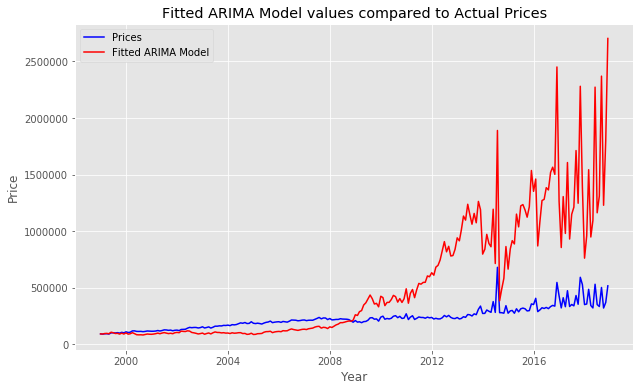

In [59]:
arima_diff_preds = pd.Series(arima_results.fittedvalues, copy=True)
arima_diff_preds_cumsum = arima_diff_preds.cumsum()
arima_log_preds = pd.Series(y_log_scale, index=y_log_scale.index)
arima_log_preds = arima_log_preds.add(arima_diff_preds_cumsum, fill_value=0)
arima_preds = np.exp(arima_log_preds)
plt.plot(y, c='b', label='Prices')
plt.plot(arima_preds, c='r', label='Fitted ARIMA Model')
plt.legend()
plt.title('Fitted ARIMA Model values compared to Actual Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Graph 3.17

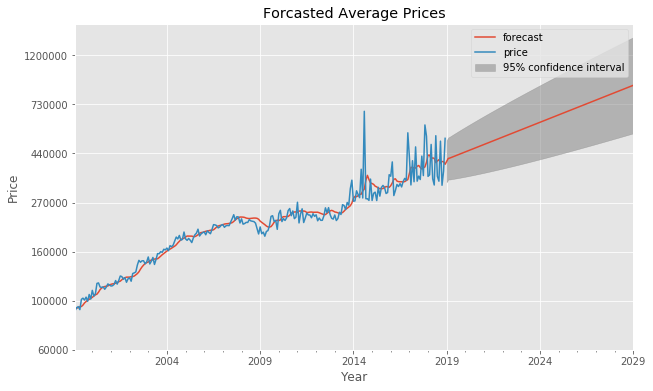

In [60]:
arima_results.plot_predict(1, 360)
y_labels = [int(i) for i in list(np.round(np.exp(np.arange(11, 14.5, 0.5)), -4))]
plt.yticks(np.arange(11, 14.5, 0.5), labels=y_labels)
plt.title('Forcasted Average Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()